# Consulting Project
## Group 3

In [31]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Loan_Default.csv')

In [3]:
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [4]:
df.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

In [5]:
df.describe()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


In [6]:
# Nulls
null_df = pd.DataFrame(df.isnull().sum())

In [7]:
null_df = null_df[ null_df[0] != 0]
null_df.to_excel('null_table..xlsx')

In [8]:
describe_numeric_df = pd.DataFrame(df.iloc[:, 2:].drop('Status', axis=1).describe(include='number').T)
print(describe_numeric_df)

                         count           mean            std           min  \
loan_amount           148670.0  331117.743997  183909.310127  16500.000000   
rate_of_interest      112231.0       4.045476       0.561391      0.000000   
Interest_rate_spread  112031.0       0.441656       0.513043     -3.638000   
Upfront_charges       109028.0    3224.996127    3251.121510      0.000000   
term                  148629.0     335.136582      58.409084     96.000000   
property_value        133572.0  497893.465696  359935.315562   8000.000000   
income                139520.0    6957.338876    6496.586382      0.000000   
Credit_Score          148670.0     699.789103     115.875857    500.000000   
LTV                   133572.0      72.746457      39.967603      0.967478   
dtir1                 124549.0      37.732932      10.545435      5.000000   

                               25%           50%            75%           max  
loan_amount           196500.00000  296500.00000  436500.0000

In [9]:
describe_numeric_df.to_excel('describe_result.xlsx')

In [10]:
df['year'].value_counts()

year
2019    148670
Name: count, dtype: int64

In [11]:
df.shape[0]

148670

In [12]:
df.shape[1]

34

In [13]:
df.dtypes

ID                             int64
year                           int64
loan_limit                    object
Gender                        object
approv_in_adv                 object
loan_type                     object
loan_purpose                  object
Credit_Worthiness             object
open_credit                   object
business_or_commercial        object
loan_amount                    int64
rate_of_interest             float64
Interest_rate_spread         float64
Upfront_charges              float64
term                         float64
Neg_ammortization             object
interest_only                 object
lump_sum_payment              object
property_value               float64
construction_type             object
occupancy_type                object
Secured_by                    object
total_units                   object
income                       float64
credit_type                   object
Credit_Score                   int64
co-applicant_credit_type      object
a

In [14]:
df['Gender'].unique()

array(['Sex Not Available', 'Male', 'Joint', 'Female'], dtype=object)

In [15]:
df.isnull().sum()

ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

In [16]:
df['Status'].nunique()

2

## Data Cleaning

In [17]:
# Get numeric column names
numeric_columns = df.select_dtypes(include='number').columns.tolist()

#Get non-numeric colums
non_numeric_columns = [col for col in df.columns.tolist() if col not in numeric_columns]

In [18]:
# Imputate values with mean column value for numeric variables
# Except term -- Mode
for col in numeric_columns:
    if df[col].isnull().sum() != 0 and col != 'term':
        col_mean = df[col].mean()
        df.fillna({col: col_mean}, inplace=True)

# Handle term here
col_mode = df['term'].mode()[0]
df.fillna({'term': col_mode}, inplace=True)

# Imputate values with mode column value for non-numerical variables
for col in non_numeric_columns:
    if df[col].isnull().sum() != 0:
        col_mode = df[col].mode()[0]
        df.fillna({col: col_mode}, inplace=True)

In [19]:
# Check results
df.isnull().sum()

ID                           0
year                         0
loan_limit                   0
Gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
Credit_Worthiness            0
open_credit                  0
business_or_commercial       0
loan_amount                  0
rate_of_interest             0
Interest_rate_spread         0
Upfront_charges              0
term                         0
Neg_ammortization            0
interest_only                0
lump_sum_payment             0
property_value               0
construction_type            0
occupancy_type               0
Secured_by                   0
total_units                  0
income                       0
credit_type                  0
Credit_Score                 0
co-applicant_credit_type     0
age                          0
submission_of_application    0
LTV                          0
Region                       0
Security_Type                0
Status  

### Visuals

In [22]:
# Drop NaN values for accurate statistical testing
df_clean = df[['dtir1', 'Status']].dropna()

# Split data into defaulted and non-defaulted groups
dti_default = df_clean[df_clean['Status'] == 1]['dtir1']
dti_non_default = df_clean[df_clean['Status'] == 0]['dtir1']

# Perform an independent t-test (Welch’s t-test for unequal variance)
t_stat, p_value = stats.ttest_ind(dti_default, dti_non_default, equal_var=False)

# Display results
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:}")

T-statistic: 23.8702
P-value: 2.25186518626059e-125


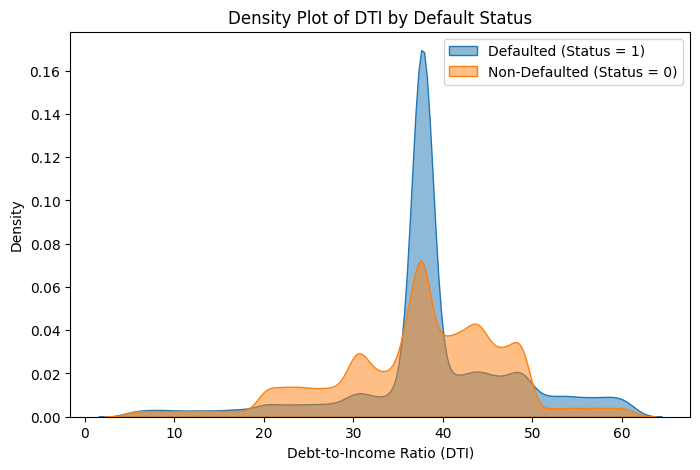

In [32]:
# Density Plot

# Create a density plot for Debt-to-Income Ratio (DTI) by Default Status
plt.figure(figsize=(8, 5))
sns.kdeplot(dti_default, label="Defaulted (Status = 1)", fill=True, alpha=0.5)
sns.kdeplot(dti_non_default, label="Non-Defaulted (Status = 0)", fill=True, alpha=0.5)
plt.xlabel("Debt-to-Income Ratio (DTI)")
plt.ylabel("Density")
plt.title("Density Plot of DTI by Default Status")
plt.legend()
plt.show()